## Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Load Cleaned Data

In [2]:
df = pd.read_csv("../data/bank_cleaned.csv")
data = df.copy()
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Separate Features and Target

In [3]:
# Features
X = data.drop(columns=['deposit'])

# Target
y = data['deposit']

## Split Dataset into Training and Testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 8929, Testing samples: 2233


## Initialize and Train Random Forest

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Make Predictions

In [6]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

## Evaluate Model Performance

In [7]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")

Accuracy: 0.845
Precision: 0.813
Recall: 0.873
F1-score: 0.842
AUC-ROC: 0.911


## Confusion Matrix

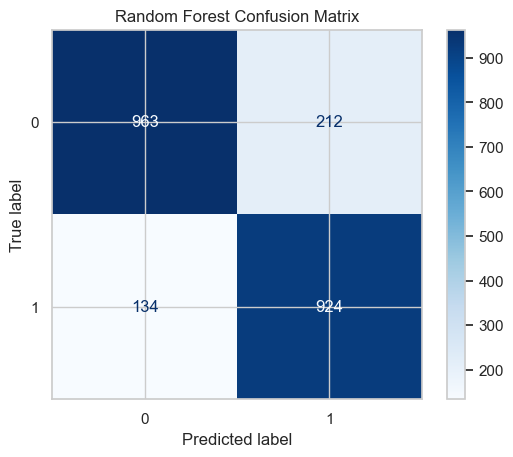

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

## ROC Curve

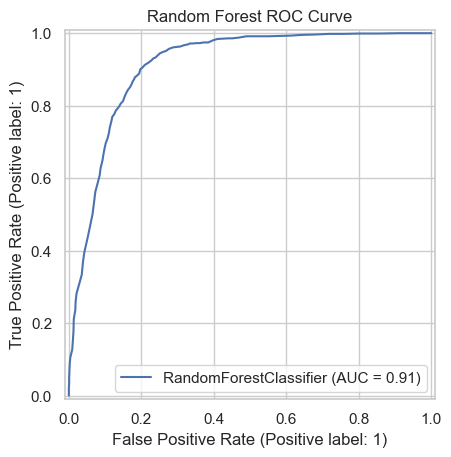

In [9]:
roc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.show()

## Cross-Validation

In [10]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

5-Fold CV Accuracy: 0.807 ± 0.031
